In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, lil_matrix,identity
from pprint import pprint

def box_house(posx, posy, x, y):
  return (posx < x and x < posx + 18 and posy < y and y < posy + 18)

def l_house(posx, posy, x, y):
  if posx < x and x < posx + 18 and posy < y and y < posy + 78:
    return True
    
  posx = posx - 12
  posy = posy + 60

  return (posx < x and x < posx + 13 and posy < y and y < posy + 18)

def L_house(posx,posy,x,y):
  if posx < x and x < posx + 18 and posy < y and y < posy + 78:
    return True
    
  posx = posx+12

  return (posx < x and x < posx + 12 and posy < y and y < posy + 18)

def houses_check(x, y):
  boxes = [(69, 111), (69, 264),
           (138, 12), (138, 165),
           (192, 111), (192, 264),
           (261, 12), (261, 165)]
  L_houses = [(69, 12), (69, 165),
              (192, 12), (192, 165)]
  
  l_houses = [(138, 51), (138, 204),
              (261, 51), (261, 204)]
  for box in boxes:
    if box_house(box[0], box[1], x, y):
      return True

  for house in L_houses:
    if L_house(house[0], house[1], x, y):
      return True
  
  for house in l_houses:
    if l_house(house[0], house[1], x, y):
      return True
      
  return False


# if edge_cond_check(neighbour.x,neighbour.y) == true
# A[idx,idx]-neighbour.coefficient
def edge_cond_check(x, y):
  if houses_check(x, y):
    return True
  if x > 299 or y > 299 or y == 0:
    return True

  return False

def crossSchema(eps = 1e-8):   
  lambda1 = 1.0
  lambda2 = 0
  steps = 30000
  n = 300
  k = 0.5
  h = 1 / n
  tau = h * h / (4 * k)


  N = n * n
  
  x = np.zeros((N, 1))
  for i in range(300):
    x[300 * i, 0]=1
    
  A = lil_matrix((N, N))
  
  b = np.zeros(N)
    
  dx = [1, -1, 0, 0]
  dy = [0, 0, 1, -1]
  u0coeff = 1 - 4 * (tau * k) / (h**2)
  coeffs = [tau * (k / (h**2) - lambda1 / (2*h)),
            tau * (k / (h**2) + lambda1 / (2*h)),
            tau * (k / (h**2) - lambda2 / (2*h)),
            tau * (k / (h**2) + lambda2 / (2*h))]

  for i in range(0, n): 
      for e in range(0, n):
          ind = i * n + e
          if i == 0:
            A[ind, ind] = 0
            continue 
          A[ind, ind] = u0coeff
          for j in range(0, 4):
              x1 = i + dx[j]
              y1 = e + dy[j]
              coeff = coeffs[j]

              if x1==0:
                  b[ind] -= coeff
              elif edge_cond_check(x1, y1):
                  A[ind, ind] += coeff
              else:
                  A[ind, x1 * 300 + y1] = coeff

  A = csr_matrix(A)

  b = b.reshape(N, -1)
  for i in range(steps):
    x_new = (A * x - b)
    error = np.max(np.abs(x_new - x))
    if error < eps:
        break
    x = x_new
  return x.reshape((300,300))


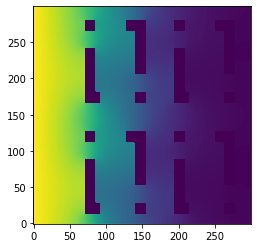

Used M = 300
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66632312, 0.99785718, 0.99785749, ..., 0.99703364, 0.99703299,
        0.99703267],
       [0.99636611, 0.99569996, 0.99570058, ..., 0.99404744, 0.99404615,
        0.9940455 ],
       ...,
       [0.01650417, 0.01387668, 0.01387233, ..., 0.01903555, 0.01906132,
        0.01907421],
       [0.01645928, 0.01385291, 0.01384865, ..., 0.01899163, 0.01901727,
        0.0190301 ],
       [0.01643128, 0.01384101, 0.0138368 , ..., 0.01896961, 0.01899519,
        0.01900799]])


In [26]:
x_res = crossSchema(eps=1e-8)
plt.imshow(x_res.T)
plt.gca().invert_yaxis()
plt.show()
print("Used M = 300")
pprint(x_res)

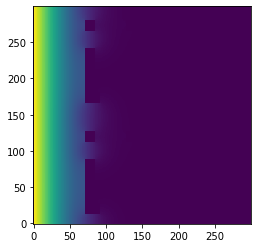

Used M = 300
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.62108357e-01, 9.85202030e-01, 9.85202131e-01, ...,
        9.85122863e-01, 9.85122762e-01, 9.85122710e-01],
       [9.77711483e-01, 9.70314810e-01, 9.70315013e-01, ...,
        9.70155630e-01, 9.70155425e-01, 9.70155322e-01],
       ...,
       [2.01420154e-11, 1.12928384e-11, 1.12422583e-11, ...,
        2.72233590e-11, 2.73590392e-11, 2.74267515e-11],
       [1.88483035e-11, 1.07112858e-11, 1.06638064e-11, ...,
        2.58971901e-11, 2.60275266e-11, 2.60925984e-11],
       [1.80459756e-11, 1.04233983e-11, 1.03774569e-11, ...,
        2.52397398e-11, 2.53673944e-11, 2.54311407e-11]])


In [27]:
x_res = crossSchema(eps=10e-5)
plt.imshow(x_res.T)
plt.gca().invert_yaxis()
plt.show()
print("Used M = 300")
pprint(x_res)